### Fake News Classification using NLP
**Project Workflow**
1. Problem Statement 
2. Data Collection
3. Importing required libraries
4. Importing data as csv file
4. Exploratory Data Analysis
4. Data Preparation and Preprocessing
   - Tokenization
   - Lower case conversion
   - Stopwords
   - Lemmatization/Stemming
5. Vectorization
   - Bag of words
   - TF-IDF
6. Model Building and Evaluation
7. Model Deployment


#### Problem Statement
The prevalence of fake news on online media platforms is increasingly recognized as a critical concern for society, as it has the potential to manipulate public opinion, incite social unrest, and erode trust in credible news sources. To mitigate the negative impact of fake news, the development of an effective classification system capable of accurately identifying and filtering false news articles from genuine sources is essential. However, building such a system presents numerous challenges, including the multifaceted and intricate nature of news content, the rapid dissemination of fake news through social media channels, and the possibility of biased or incomplete datasets. As such, it is imperative to develop an accurate and reliable fake news classification system leveraging advanced natural language processing (NLP) techniques. By achieving this, we can safeguard the integrity of news and promote public trust in media outlets.


#### Data collection
The datasets is available on kaggle in the provided link 


#### Importing required libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

#### Importing data as csv file

In [7]:
#Define path to data
data_path = r"C:\Users\ME\Desktop\Blessing_AI\Fake_News\Data\fake_news_data.csv"
#read data as dataframe
df = pd.read_csv(data_path)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


#### Exploratory Data Analysis

In [8]:
#check data shape
df.shape

(20800, 5)

In [9]:
#check data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [10]:
#drop id column
df = df.drop("id",axis= 1)
print(f"Columns are {df.columns}")

Columns are Index(['title', 'author', 'text', 'label'], dtype='object')


In [25]:
#check missing values
df.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [17]:
#Check number of classes in label
df["label"].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

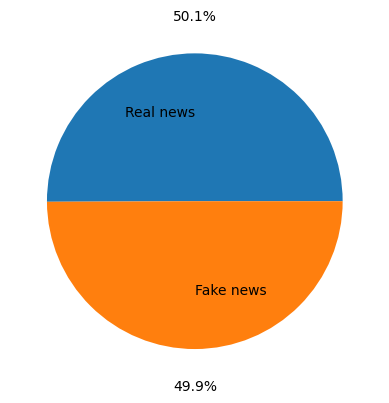

In [19]:
#Draw distibution of classes in label to check for imbalance
sizes = df["label"].value_counts().values
labels = ["Real news","Fake news"]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)
plt.show()


Comment : Data is balanced

In [22]:
#Check different titles
df["title"][5]

'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart'

In [24]:
#chek different text description of news
df["text"][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

Comment : only the title of the news with be used for training our model to decrease preprocessing time and reduce model complexity since every text description of news seems too large

#### Data Preparation and preprocessing

In [ ]:
#Dropping missing values
df = df.dropna()
df.shape

In [31]:
#Downloading wordnet for nltk to avoid error
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ME\AppData\Roaming\nltk_data...


KeyboardInterrupt: 

In [30]:
#initialise lemmatization object
lm = WordNetLemmatizer()

#create stop words object
stopwords = stopwords.words("english")
def preprocess_text(df,feature)
        #initialise corpus to store texts p
        corpus = []
        for i in range(len(df)):
            review = re.sub("a-zA-Z0-9"," ",df[feature][i])
            review = review.lower() #convert to lower case
            review = review.split() #Tokenize text
            review = [lm.lemmatize(x) for x in review if x not in stopwords] #lemmatize and removing stopwords
            review  = " ".join(review) #join as text
            corpus.append(review)
            
        return corpus
#preprocess text and get desired document 
corpus =   preprocess_text(df = df,feature = "title") 

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\ME/nltk_data'
    - 'C:\\Users\\ME\\anaconda3\\envs\\fake_news\\nltk_data'
    - 'C:\\Users\\ME\\anaconda3\\envs\\fake_news\\share\\nltk_data'
    - 'C:\\Users\\ME\\anaconda3\\envs\\fake_news\\lib\\nltk_data'
    - 'C:\\Users\\ME\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


#### Vectorization

In [ ]:
#Convert texts to array using tfidf vectorizer
tf = TfidfVectorizer()
x = tf.fit_transform(corpus).toarray()
x

#### Data splitting into train and test

In [28]:
review = re.sub("a-zA-Z0-9"," ",df["title"][0])
review

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [29]:
df["title"][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'